In [1]:
import pandas as pd
from fbprophet import Prophet

# Load Dataset

In [2]:
data = pd.read_csv('stocks.csv')
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [12]:
df = data.copy()
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


# Data Preprocessing

In [25]:
# data_test = data['Name'].value_counts() >= 1259
data_test = data['Name'].value_counts()[data['Name'].value_counts() >= 1259]
len(data_test)

470

In [27]:
df = df.groupby("Name").filter(lambda g: (g.Name.size >= 1259))
len(df['Name'].unique())

470

In [30]:
df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP', 'AMT',
       'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD',
       'APH', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP',
       'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY', 'BDX', 'BEN',
       'BF.B', 'BIIB', 'BK', 'BLK', 'BLL', 'BRK.B', 'BSX', 'BWA', 'BXP',
       'CAG', 'CAH', 'CAT', 'CA', 'CBG', 'CBOE', 'CBS', 'CB', 'CCI',
       'CCL', 'CDNS', 'CELG', 'CERN', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR',
       'CINF', 'CI', 'CLX', 'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI',
       'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COL', 'COO', 'COP', 'COST',
       'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS',
       'CVX', 'CXO', 'C', 'DAL', 'DE', 'DFS', 'DGX', 'DG',

# Select Stock

In [31]:
name_abbr = 'AAL'

df_ = df[df['Name'] == name_abbr]
df_

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL


In [32]:
high_prices = df_['high'].values
low_prices = df_['low'].values
df_['mid_prices'] = (high_prices + low_prices) / 2
df_

c:\users\jsson\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,open,high,low,close,volume,Name,mid_prices
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,14.875
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,14.635
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,14.305
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,14.595
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,14.060
...,...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL,54.115
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL,53.010
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL,51.070
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL,50.145


In [40]:
df_['date'] = pd.to_datetime(df_['date'])

df_ = df_[['date', 'mid_prices']].reset_index(drop=True)

df_ = df_.rename(columns={'date': 'ds', 'mid_prices': 'y'})

df_.head()

,ds,y
0,2013-02-08,14.875
1,2013-02-11,14.635
2,2013-02-12,14.305
3,2013-02-13,14.595
4,2013-02-14,14.060


<AxesSubplot:xlabel='ds'>

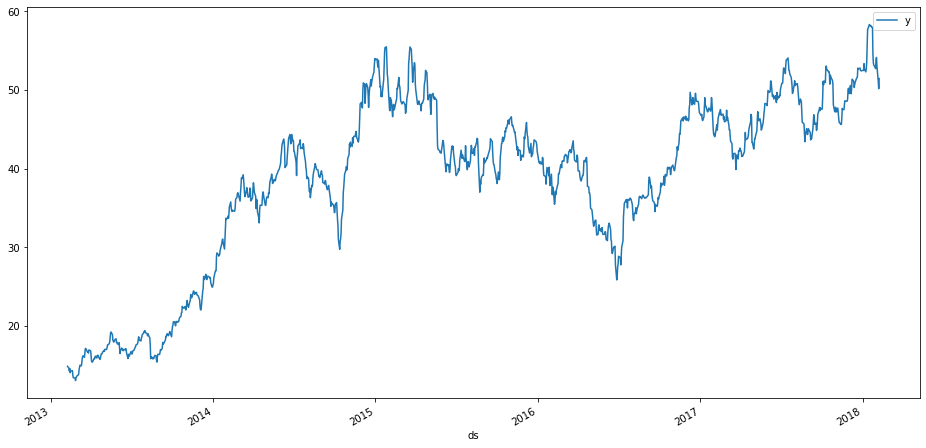

In [41]:
df_.plot(x='ds', y='y', figsize=(16, 8))

# Model Prediction

In [42]:
model = Prophet()

model.fit(df_)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
future = model.make_future_dataframe(periods=1500)

forecast = model.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2754,2022-03-14,86.839974,15.430561,156.250870,13.578954,153.707093,2.136381,2.136381,2.136381,-0.521465,-0.521465,-0.521465,2.657846,2.657846,2.657846,0.0,0.0,0.0,88.976356
2755,2022-03-15,86.862476,15.473428,156.536617,13.577012,153.748079,2.106536,2.106536,2.106536,-0.535661,-0.535661,-0.535661,2.642197,2.642197,2.642197,0.0,0.0,0.0,88.969011
2756,2022-03-16,86.884977,15.128812,156.197839,13.577588,153.789066,2.125819,2.125819,2.125819,-0.496549,-0.496549,-0.496549,2.622368,2.622368,2.622368,0.0,0.0,0.0,89.010796
2757,2022-03-17,86.907479,16.566686,155.556678,13.578834,153.830053,2.096430,2.096430,2.096430,-0.501786,-0.501786,-0.501786,2.598216,2.598216,2.598216,0.0,0.0,0.0,89.003908
2758,2022-03-18,86.929980,16.893312,156.866551,13.580268,153.871039,2.098737,2.098737,2.098737,-0.470858,-0.470858,-0.470858,2.569595,2.569595,2.569595,0.0,0.0,0.0,89.028717


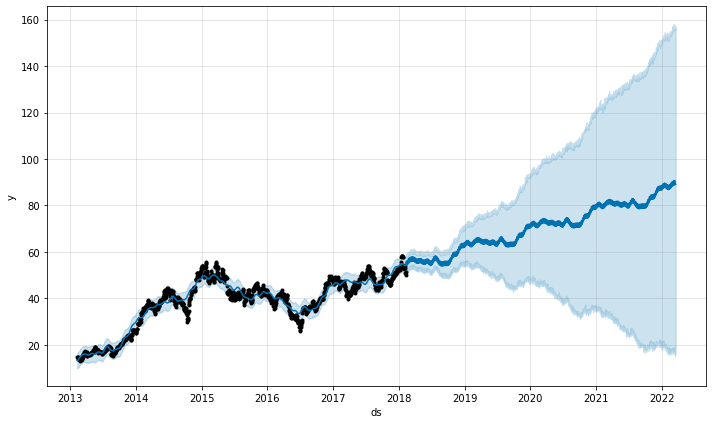

In [47]:
fig1 = model.plot(forecast)

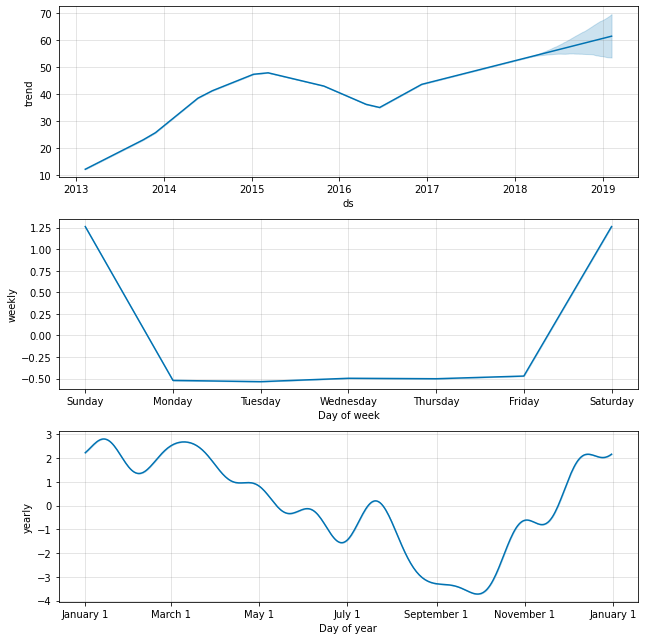

In [45]:
fig2 = model.plot_components(forecast)

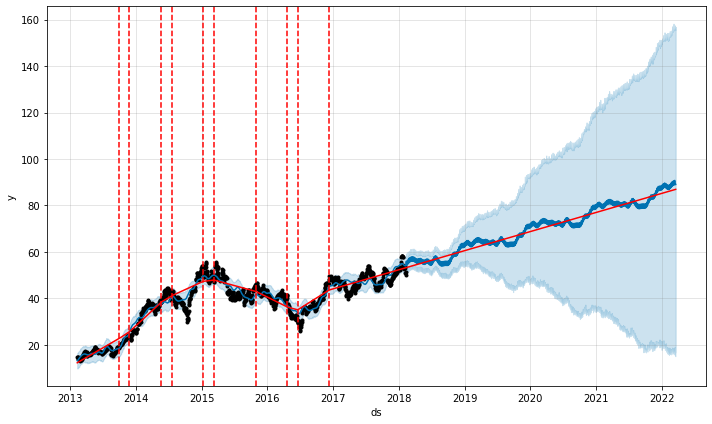

In [49]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)